In [10]:
import numpy as np 
import pandas as pd

In [11]:
#Read Dataset
# abc_real = pd.read_csv('./Datasets-fakenews/abcnews-date-text.csv').dropna()
# https://www.kaggle.com/mrisdal/fake-news
fake = pd.read_csv('./Datasets-fakenews/fake.csv', usecols = ['title', 'text']).dropna()
# https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
fake1 = pd.read_csv('./Datasets-fakenews/fake1.csv', usecols = ['title', 'text']).dropna()
real1 = pd.read_csv('./Datasets-fakenews/true1.csv', usecols = ['title', 'text']).dropna()
# https://bitbucket.org/WiZar-D/fake_real_dataset/downloads/
fake_real = pd.read_csv('./Datasets-fakenews/fake_or_real_news.csv', usecols = ['title', 'text', 'label']).dropna()

# https://www.kaggle.com/snapcrack/all-the-news?select=articles3.csv
articles1 = pd.read_csv('./Datasets-fakenews/articles1.csv', usecols = ['title', 'content']).dropna()
articles2 = pd.read_csv('./Datasets-fakenews/articles2.csv', usecols = ['title', 'content']).dropna()
articles3 = pd.read_csv('./Datasets-fakenews/articles3.csv', usecols = ['title', 'content']).dropna()


In [12]:
# print("abc_real")
# print(abc_real.head())
print("fake")
print(fake.head())
print("fake1")
print(fake1.head())
print("fake_real")
print(fake_real.head())
print("real1")
print(real1.head())


print("articles1")
print(articles1.head())
print("articles2")
print(articles2.head())
print("articles3")
print(articles3.head())

fake
                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text  
0  Print They should pay all the back all the mon...  
1  Why Did Attorney General Loretta Lynch Plead T...  
2  Red State : \nFox News Sunday reported this mo...  
3  Email Kayla Mueller was a prisoner and torture...  
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  
fake1
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Tr

In [13]:
# print("abc_real")
# print(abc_real.columns.values)
# print(len(abc_real))
print("fake")
print(fake.columns.values)
print(len(fake))
print("fake1")
print(fake1.columns.values)
print(len(fake1))
print("fake_real")
print(fake_real.columns.values)
print(len(fake_real))
print("real1")
print(real1.columns.values)
print(len(real1))


print("articles1")
print(articles1.columns.values)
print(len(articles1))
print("articles2")
print(articles2.columns.values)
print(len(articles2))
print("articles3")
print(articles3.columns.values)
print(len(articles3))

fake
['title' 'text']
12273
fake1
['title' 'text']
23481
fake_real
['title' 'text' 'label']
6335
real1
['title' 'text']
21417
articles1
['title' 'content']
50000
articles2
['title' 'content']
49998
articles3
['title' 'content']
42570


In [14]:
#Rename dataframe columns and Combine all datasets

fake['label'] = 1
fake1['label'] = 1
fake_real['label'] = [(1 if label == 'FAKE' else 0) for label in fake_real['label']]
real1['label'] = 0


articles1.rename(columns={"content": "text"}, inplace=True)
articles2.rename(columns={'content': "text"}, inplace=True)
articles3.rename(columns={'content': "text"}, inplace=True)

articles1['label'] = 0
articles2['label'] = 0
articles3['label'] = 0


data = pd.concat([fake, fake1, fake_real, real1, articles1, articles2, articles3])
num_real = sum(data['label'] == 0)
num_fake = sum(data['label'] == 1)

print("Whole dataset contains: " + str(num_real) + " Real headlines and " + str(num_fake) + " Fake headlines.")

Whole dataset contains: 167156 Real headlines and 38918 Fake headlines.


In [15]:
data.to_csv("./Datasets-fakenews/Fake_news.csv",index=False)

In [7]:
import gensim
import nltk as nl
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words

# nltk.download('stopwords')
nltk_stopwords = stopwords.words("english")
gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS
sklearn_stopwords = stop_words.ENGLISH_STOP_WORDS
combined_stopwords = sklearn_stopwords.union(nltk_stopwords,gensim_stopwords)

/anaconda3/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
print('NLTK has {} stop words'.format(len(nltk_stopwords)))
print('Gensim has {} stop words'.format(len(gensim_stopwords)))
print('Sklearn has {} stop words'.format(len(sklearn_stopwords)))
print('Combined stopwords list has {} stop words'.format(len(combined_stopwords)))

NLTK has 179 stop words
Gensim has 337 stop words
Sklearn has 318 stop words
Combined stopwords list has 390 stop words


In [9]:
# from sklearn.utils import shuffle
# data = shuffle(data, random_state = 7)
# data.reset_index(inplace=True, drop=True)
# ###subset data for 

# data, data_unused = np.split(data, [int(.3*len(data))])

# num_real = sum(data['label'] == 0)
# num_fake = sum(data['label'] == 1)

# print("Whole dataset contains: " + str(num_real) + " Real headlines and " + str(num_fake) + " Fake headlines.")

In [10]:
from nltk.stem import PorterStemmer 
porter_stemmer = PorterStemmer() 

In [11]:
data['title'] = data['title'].apply(lambda x: x.lower()) ## change all to lower case
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
data['title'] = data['title'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (combined_stopwords)]))

data['text'] = data['text'].apply(lambda x: x.lower()) ## change all to lower case
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
data['text'] = data['text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (combined_stopwords)]))


In [20]:
data.to_csv("./Datasets-fakenews/Fake_news_clean.csv",index=False)

In [13]:
from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test=train_test_split(data['title'], data['label'], test_size=0.2, random_state=7)
x_train_title,x_test_title,y_train_title,y_test_title=train_test_split(data['title'], data['label'], test_size=0.3, random_state=7)

x_train_text,x_test_text,y_train_text,y_test_text=train_test_split(data['text'], data['label'], test_size=0.3, random_state=7)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten, Embedding, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [15]:
# nltk.download('punkt')
# tfidf_vectorizer = TfidfVectorizer(tokenizer = word_tokenize, max_features = 300)
# tfidf_train = tfidf_vectorizer.fit_transform(x_train)
# tfidf_test = tfidf_vectorizer.transform(x_test)
# tfidf_features = tfidf_vectorizer.get_feature_names()

tfidf_vectorizer_title = TfidfVectorizer(tokenizer = word_tokenize)
tfidf_train_title = tfidf_vectorizer_title.fit_transform(x_train_title)
tfidf_test_title = tfidf_vectorizer_title.transform(x_test_title)
tfidf_features_title = tfidf_vectorizer_title.get_feature_names()

tfidf_vectorizer_text = TfidfVectorizer(tokenizer = word_tokenize)
tfidf_train_text = tfidf_vectorizer_text.fit_transform(x_train_text)
tfidf_test_text = tfidf_vectorizer_text.transform(x_test_text)
tfidf_features_text = tfidf_vectorizer_text.get_feature_names()

In [18]:
from scipy.sparse import hstack, vstack

rf = RandomForestClassifier()

tfidf_train = hstack((tfidf_train_title, tfidf_train_text))
y_train = pd.concat([y_train_title, y_train_text], axis=1).reindex(y_train_title.index)

rf.fit(tfidf_train, y_train)

tfidf_test = hstack((tfidf_test_title, tfidf_test_text))
y_test = pd.concat([y_test_title, y_test_text], axis=1).reindex(y_test_title.index)

print ("Testing Acc. of Random Forest: {} %".format(round(rf.score(tfidf_test, y_test) * 100, 2)))

Testing Acc. of Random Forest: 89.79 %


In [40]:
print(tfidf_train.get_shape)
print(len(y_train))

<bound method spmatrix.get_shape of <144251x223759 sparse matrix of type '<class 'numpy.float64'>'
	with 25894728 stored elements in COOrdinate format>>
144251


In [19]:
from scipy.sparse import hstack
score_train = rf.predict_proba(tfidf_train)
score_test = rf.predict_proba(tfidf_test)

SyntaxError: unexpected EOF while parsing (<ipython-input-19-aab6e03c868c>, line 3)

In [44]:
# print(len(list(x_train_title) + list(x_test_title)))
# print(len(list(x_train_text) + list(x_test_text)))
# print(len(list(score_train[0][:, 1]) + list(score_test[0][:, 1])))
# print(len(list(y_train_title) + list(y_test_title)))
d = {'title': list(x_train_title) + list(x_test_title), 
     'text': list(x_train_text) + list(x_test_text),
     'score': list(score_train[0][:, 1]) + list(score_test[0][:, 1]),
     'label':list(y_train_title) + list(y_test_title)}
new_data = pd.DataFrame(data=d)

new_data.to_csv("./Datasets-fakenews/Fake_news_score.csv",index=False)

In [29]:
import pickle
### Prob hash title: cleaned or before clean, shouldn't matter
# Save rf model
pickle.dump(rf, open('rf_model.p', 'wb'))

 
# load the model from disk
# loaded_model = pickle.load(open('rf_model.p', 'rb'))

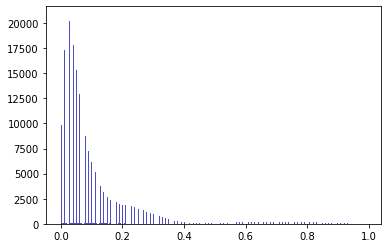

In [9]:
import matplotlib.pyplot as plt


new_data = pd.read_csv("./Datasets-fakenews/Fake_news_score.csv")
x_vals = abs(new_data['score'] - new_data['label'])
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=x_vals, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)